In [55]:
import numpy as np
# Creating an Array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [56]:
# Converting the array into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [57]:
# ... and a dataframe can as easily be converted to an array
df.values

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [94]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# makes charts pretty
import seaborn as sns
sns.set(color_codes=True)

C:\Users\virat\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Dataset $A$')

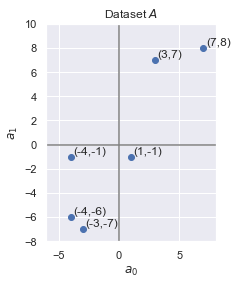

In [95]:
# plots
plt.scatter(A[:,0],A[:,1])   # create a scatter plot 

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

In [96]:
# Calculate covariance of a0 and a1
a0 = A[:,0]
a1 = A[:,1]
product = a0*a1 # element-wise product
print("Length of prod equals " + str(len(product)))
print("---")
print("Covariance:")
print(np.sum(prod)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


In [97]:
# Get more stuff using NumPy's covariance method
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [98]:
# What is A.T?
A.T # This is the transpose of matrix A

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [99]:
# Matrix Multiplication, @ operator is used for calculating the dot product of two matrices
A.T @ A # or np.dot(A.T,A)

array([[100, 125],
       [125, 200]])

In [100]:
# As stated in the formula now we need to divide the  product by (m-1) to yield true Sample Covariance Matrix
# Let's call it Sigma
Sigma = (A.T @ A)/(m-1) # or np.cov(A.T)
Sigma

array([[20., 25.],
       [25., 40.]])

In [101]:
# obtaining the eigenvalues and eigen vectors for the matrix Sigma
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[ 3.07417596 56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


Recall from your Linear Algebra class that the following should hold:

\begin{eqnarray}
\Sigma x_0 &=& \lambda_0 x_0 \nonumber \\
\Sigma x_1 &=& \lambda_1 x_1 \nonumber \\
\end{eqnarray}

In [102]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) # scalar times 2x1

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [103]:
# ... and the product with the second eigenvalue
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [104]:
print("The first principal component is eigenvector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [105]:
# Are the two Principal components Orthogonal? If the dot product of two matrices is zero, then they are considered to be orthogonal
X[:,1].T @ X[:,0]

0.0

C:\Users\virat\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

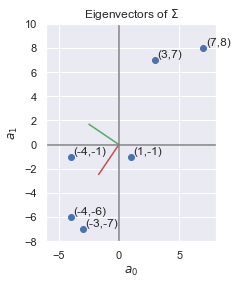

In [106]:
# plotting the Eigen Vectors
plt.scatter(A[:,0],A[:,1])
scale = 3 # increase this scaling factor to highlight these vectors
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

#### Dimensionality Reduction: 2D to 1D

In [112]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [110]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [111]:
Acomp = Amat @ pc1 # the dot product of a 6x2 and 2x1 matrix yields a 6x1 matrix
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [113]:
Arec = Acomp @ pc1.T # the dot product of a  6x1 matrix and 1x2 matrix results into a 6x2 matrix
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


C:\Users\virat\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

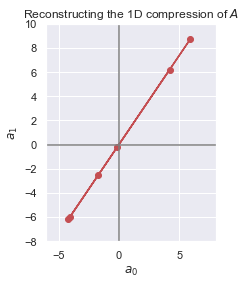

In [117]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [118]:
print(np.linalg.matrix_rank(Amat)) # originally a Rank 2 matrix
print(np.linalg.matrix_rank(Arec)) # reconstructed matrix is Rank 1

2
1


By taking on the Rank-1 matrix related to the 2nd eigenvector you get back to the original data

In [119]:
# Add the Rank 1 matrix for the other vector to recover A completely
# Here we are taking the dot product of matrix A with the principal components and the transpose of the principal components
Amat @ Xmat[:,1] @ Xmat[:,1].T + Amat @ Xmat[:,0] @ Xmat[:,0].T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

In [121]:
# Why does this work? Well, recall that the dot product of a matrix and its transpose (X @ X.T) is an identity matrix as X is orthonormal
# Hence the entire expression becomes equivalent to multiplying a matrix with a unit matrix which returns the matrix itself.
A @ Xmat @ Xmat.T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

C:\Users\virat\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Back to $A$')

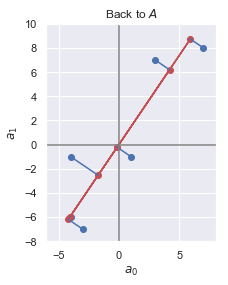

In [122]:
# plots
plt.scatter(A[:,0], A[:,1]) # A in blue
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# across observations
for i in range(m):
    e = np.vstack((A[i],Arec[i]))
    plt.plot(e[:,0],e[:,1],'b') # BLUE

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Back to $A$")